In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler



In [18]:
## loading train dataset 
## exploration only on train data as it is complete and accurate
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
## checking misssing values
df.isnull().sum() #missing values Age 177,Cabin 687, Embarked 2
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
percent_missing.sort_values(ascending=False, inplace=True) #in descending order 
percent_missing

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [21]:
## explore unique values for each column
column_names = list(df.columns)
for col in column_names:
    print(col, ':', df[col].nunique(), )

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


In [22]:
## explore 'Age'
df['Age'].nunique()
df['Age'].value_counts() 
df['Age'].max() #0.42yo-80yo


80.0

In [23]:
## explore 'SibSp' and 'Pclass
df['SibSp'].value_counts()   #0-5 siblings
df['Parch'].value_counts()   #df['Parch'].value_counts(normalize=True)  for % 
df['Pclass'].value_counts(ascending=True) 



Pclass
2    184
1    216
3    491
Name: count, dtype: int64

In [24]:
## explore 'Fare' 
df['Fare'].value_counts()   #0-5 siblings
df['Fare'].max() #512.3292
df['Fare'].min() #0.0

df[df['Fare']==0.0].value_counts()
df[df['Fare']==512.3292].value_counts()

PassengerId  Survived  Pclass  Name                                Sex   Age   SibSp  Parch  Ticket    Fare      Cabin        Embarked
680          1         1       Cardeza, Mr. Thomas Drake Martinez  male  36.0  0      1      PC 17755  512.3292  B51 B53 B55  C           1
738          1         1       Lesurer, Mr. Gustave J              male  35.0  0      0      PC 17755  512.3292  B101         C           1
Name: count, dtype: int64

## Correlation Matrix
To check the relationship between independent variables and target variable('Survivor')

<Axes: >

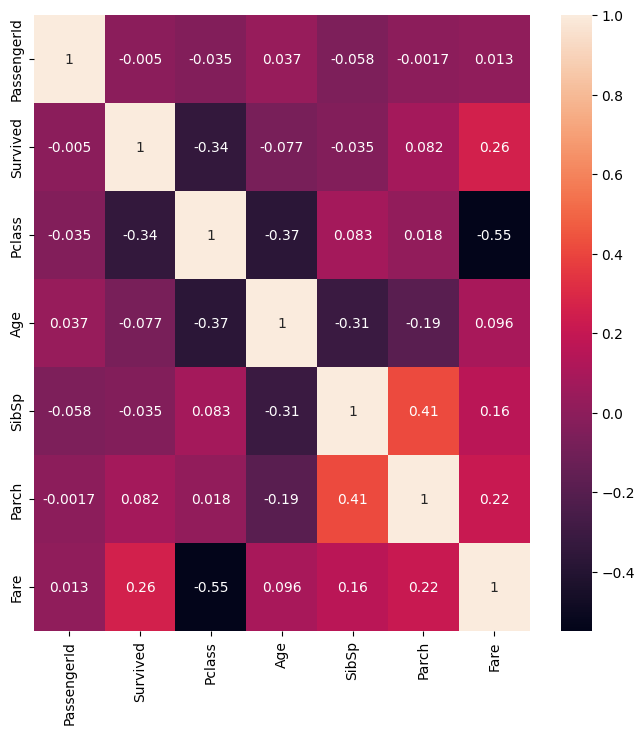

In [25]:
## check for correlation
corr_mat = df.corr(numeric_only=True)
corr_mat

## show correlation using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_mat,annot=True) 

#sex = -0.54 highest negative correlation, survival rate decreases for male
#Pclass = -0.34, the lower the class,
#Fare = 0.26
#embarked = -0.16
#all remaining less 0.1


## Exploring the top 4 correlated variables

In [26]:
##highest correlated variable

## dataframe of number of survivors according to their gender
sex_survived = df.groupby(["Sex", "Survived"]).size().reset_index(name="Count")
sex_survived = pd.DataFrame(sex_survived)
sex_survived['Percentage'] = round(sex_survived['Count'] *100/ len(df),2)
sex_survived

,Sex,Survived,Count,Percentage
0,female,0,81,9.09
1,female,1,233,26.15
2,male,0,468,52.53
3,male,1,109,12.23


/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_29619/2361392027.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])


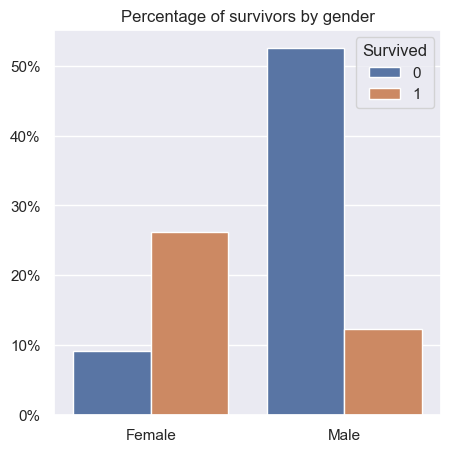

In [27]:
## graph of number of survivors according to their gender
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = "Sex", y = 'Percentage',data=sex_survived, hue='Survived')

ax.set_title('Percentage of survivors by gender')
ax.set( xlabel= None, ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])
ax.set_xticklabels(['Female', 'Male'])

plt.show()


In [28]:
## 2nd highest correlated variable

## dataframe of number of survivors according to their social-economic class
class_survived = df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")
class_survived = pd.DataFrame(class_survived)
class_survived['Percentage'] = round(class_survived['Count'] *100/ len(df),2)
class_survived

,Pclass,Survived,Count,Percentage
0,1,0,80,8.98
1,1,1,136,15.26
2,2,0,97,10.89
3,2,1,87,9.76
4,3,0,372,41.75
5,3,1,119,13.36


/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_29619/530341779.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])


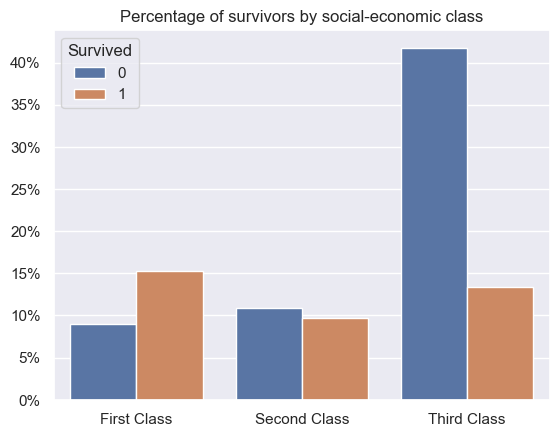

In [29]:
## graph of number of survivors according to their social economic class

ax = sns.barplot(x = "Pclass", y = 'Percentage',data=class_survived, hue='Survived')
ax.set_title('Percentage of survivors by social-economic class')
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax.set( xlabel= None, ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])

plt.show()



In [30]:
## 3nd highest correlated variable

## dataframe of number of survivors according to the ticket fare 
fare_survived = df.groupby(["Fare", "Survived"]).size().reset_index(name="Count")
fare_survived = pd.DataFrame(fare_survived)
fare_survived['Percentage'] = round(fare_survived['Count'] *100/ len(df),2)
fare_survived

,Fare,Survived,Count,Percentage
0,0.0000,0,14,1.57
1,0.0000,1,1,0.11
2,4.0125,0,1,0.11
3,5.0000,0,1,0.11
4,6.2375,0,1,0.11
...,...,...,...,...
325,247.5208,1,1,0.11
326,262.3750,1,2,0.22
327,263.0000,0,2,0.22
328,263.0000,1,2,0.22


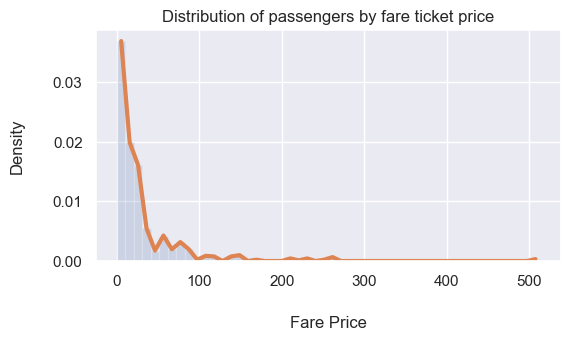

In [47]:
## graph of the fare ticket price distribution 
# line starting from mid-bin

plt.figure(figsize=(6, 3))

n, bins, patches = plt.hist(
    x=df["Fare"], 
    bins=50, 
    density=True, 
    alpha=0.2 # faded histogram 
)

# find bin midpoints
bin_centers = 0.5*(bins[1:]+bins[:-1])
# draw lines connecting successive points
plt.plot(bin_centers, n, linewidth=3) 

plt.xlabel("Fare Price", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.title("Distribution of passengers by fare ticket price")

plt.show()

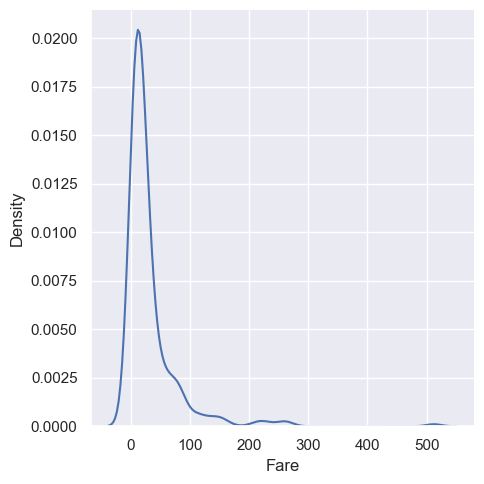

In [32]:
#talternative graph: o see the starting line better
sns.set(style="darkgrid")
sns.displot(df, x="Fare", kind="kde")
#probability density function

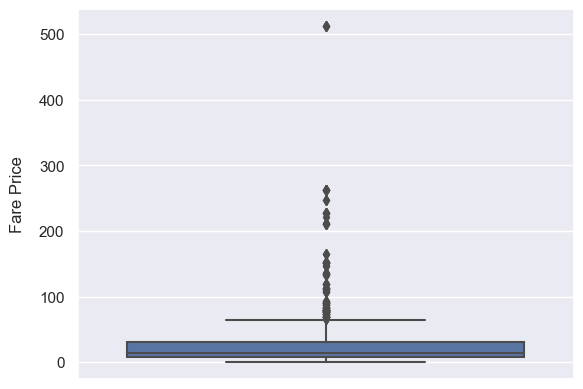

In [40]:
# boxplot of fare including outliers
sns.boxplot( y=df["Fare"] )
plt.ylabel("Fare Price", labelpad=10)
plt.show()

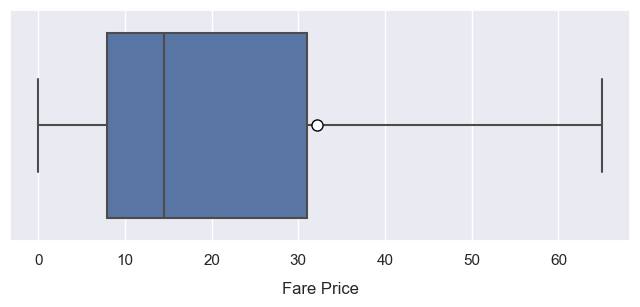

In [46]:
# to see the boxplot better by removing outliers
plt.figure(figsize=(8, 3))


sns.boxplot(x = 'Fare', data = df, showfliers = False, showmeans=True,
            meanprops={'marker':'o',                #marking the mean with the 'o' marker in white 
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

plt.xlabel("Fare Price", labelpad=10)
plt.show()


In [33]:
## 4th highest correlated variable

## dataframe of number of survivors according to their embarkement point  
embark_survived = df.groupby(["Embarked", "Survived"]).size().reset_index(name="Count")
embark_survived = pd.DataFrame(embark_survived)
embark_survived['Percentage'] = round(embark_survived['Count'] *100/ len(df),2)
embark_survived

,Embarked,Survived,Count,Percentage
0,C,0,75,8.42
1,C,1,93,10.44
2,Q,0,47,5.27
3,Q,1,30,3.37
4,S,0,427,47.92
5,S,1,217,24.35


/var/folders/j8/vzdf09mx34vcvn_f8vhtx07w0000gn/T/ipykernel_29619/2368130512.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:g}%' for x in vals])


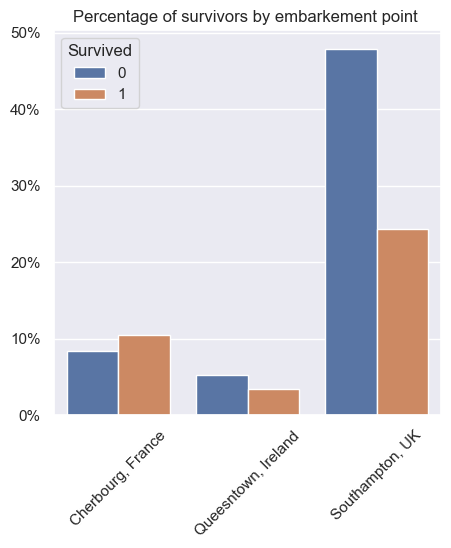

In [34]:
## graph of number of survivors according to the embarkment point

plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = "Embarked", y = 'Percentage',data=embark_survived, hue='Survived')

ax.set_title('Percentage of survivors by embarkement point ')
ax.set( xlabel= None, ylabel= None)
vals = ax.get_yticks()
ax.set_yticklabels([f'{x:g}%' for x in vals])
ax.set_xticklabels(['Cherbourg, France', 'Queesntown, Ireland', 'Southampton, UK'], rotation =45)

plt.show()
#highest survival rate from France

## CLeaning the data

In [35]:
## cleaning 
#dropping 'Name' and 'Ticket' columns which won't help in predicting
df = df.drop(['Name','Ticket'], axis=1)

#dropping 'Cabin' column because 77% of the data is missing
df = df.drop('Cabin', axis=1)

#assign mean age to missing values in 'Age'
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

#turn 'Age' float to integer 
df['Age'] = df['Age'].astype(int) #hence the minimum age 0.42 will become 0

#dropping the 2 rows that are missing in 'Embarked'
df.dropna(subset=['Embarked']) 



In [48]:
#checking dataset after cleaning, 
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


## Next: to encode 'Sex' & 'Embarked' and standardize 'Age' and 'Fare'

-encode 'Sex' & 'Embarked' to turn categorical data into numeric data for the model

-standardisation of 'Age' and 'Fare' because the range values are very far from the other features 
=>input data is transformed to have a mean of zero and a std of 1 

In [50]:
#one-hot encoder for 'Sex','Embarked' and replace it in the dataframe
le_sex = preprocessing.LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embarked = preprocessing.LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


In [51]:
#standardisation of 'Age' and 'Fare'
scaler_age = StandardScaler() #create object 
df['Age'] = scaler_age.fit_transform(df[['Age']])


scaler_fare = StandardScaler() #create object 
df['Fare'] = scaler_fare.fit_transform(df[['Fare']])

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,-0.580044,1,0,-0.502445,2
1,2,1,1,0,0.650112,1,0,0.786845,0
2,3,1,3,0,-0.272505,0,0,-0.488854,2
3,4,1,1,0,0.419458,1,0,0.420730,2
4,5,0,3,1,0.419458,0,0,-0.486337,2
